In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
!pip install sklearn

In [3]:
df=pd.read_csv('moderate.csv')
df

,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NO_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Dhaka,79.44,97.78,3.10,8.74,447.27,0.00,52.93,3.71,164.800000,Moderate,97.780000,164.800000,3.8750,0.0000,0.9275,2831.000000,52.93
1,Faridpur,91.44,110.78,7.51,9.00,540.73,0.00,49.35,4.37,204.800000,Poor,107.186667,204.800000,9.3875,0.0000,1.0925,3380.764706,49.35
2,Gazipur,77.78,95.25,2.44,6.34,423.91,0.00,51.50,4.18,159.266667,Moderate,95.250000,159.266667,3.0500,0.0000,1.0450,2693.588235,51.50
3,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.00,95.84,27.87,321.200000,Very Poor,143.126667,321.200000,19.9625,0.0000,6.9675,4480.294118,95.84
4,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.00,73.67,23.31,370.923077,Very Poor,190.346667,370.923077,22.3500,0.0000,5.8275,6404.470588,73.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,Kushtia,38.50,44.86,7.39,8.05,527.38,0.07,70.81,6.40,64.166667,Satisfactory,44.860000,64.166667,9.2375,0.0875,1.6000,3302.235294,70.81
5565,Magura,29.93,34.91,10.13,14.74,554.09,0.12,52.21,5.07,49.883333,Good,34.910000,49.883333,12.6625,0.1500,1.2675,3459.352941,52.21
5566,Meherpur,45.66,51.14,13.35,6.00,520.71,0.16,85.12,2.44,76.100000,Satisfactory,51.140000,76.100000,16.6875,0.2000,0.6100,3263.000000,85.12
5567,Narail,28.42,31.22,14.42,10.71,547.41,0.35,78.68,3.42,47.366667,Good,31.220000,47.366667,18.0250,0.4375,0.8550,3420.058824,78.68


<AxesSubplot:>

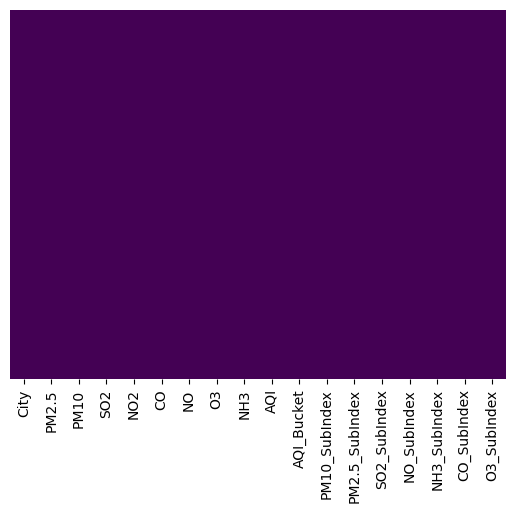

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print(df.isnull().sum())

City              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
NO                0
O3                0
NH3               0
AQI               0
AQI_Bucket        0
PM10_SubIndex     0
PM2.5_SubIndex    0
SO2_SubIndex      0
NO_SubIndex       0
NH3_SubIndex      0
CO_SubIndex       0
O3_SubIndex       0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            5569 non-null   object 
 1   PM2.5           5569 non-null   float64
 2   PM10            5569 non-null   float64
 3   SO2             5569 non-null   float64
 4   NO2             5569 non-null   float64
 5   CO              5569 non-null   float64
 6   NO              5569 non-null   float64
 7   O3              5569 non-null   float64
 8   NH3             5569 non-null   float64
 9   AQI             5569 non-null   float64
 10  AQI_Bucket      5569 non-null   object 
 11  PM10_SubIndex   5569 non-null   float64
 12  PM2.5_SubIndex  5569 non-null   float64
 13  SO2_SubIndex    5569 non-null   float64
 14  NO_SubIndex     5569 non-null   float64
 15  NH3_SubIndex    5569 non-null   float64
 16  CO_SubIndex     5569 non-null   float64
 17  O3_SubIndex     5569 non-null   f

In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

City              0.0
PM2.5             0.0
CO_SubIndex       0.0
NH3_SubIndex      0.0
NO_SubIndex       0.0
SO2_SubIndex      0.0
PM2.5_SubIndex    0.0
PM10_SubIndex     0.0
AQI_Bucket        0.0
AQI               0.0
NH3               0.0
O3                0.0
NO                0.0
CO                0.0
NO2               0.0
SO2               0.0
PM10              0.0
O3_SubIndex       0.0
dtype: float64

In [8]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NO_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
count,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000
mean,90.992505,107.160192,6.204712,9.686533,778.497021,0.750977,82.940889,14.899084,189.231543,98.352439,189.207939,7.755890,0.931147,3.724771,4779.394241,92.662860
std,56.100988,65.047642,6.520301,10.806997,428.087312,4.847535,59.167255,17.059163,113.428302,54.148535,113.380235,8.150376,5.880150,4.264791,2518.160661,76.328779
min,2.750000,3.310000,0.060000,0.160000,250.340000,0.000000,0.000000,0.000000,4.583333,3.310000,4.583333,0.075000,0.000000,0.000000,1672.588235,0.000000
25%,51.490000,61.500000,1.940000,3.090000,527.380000,0.000000,33.980000,4.500000,85.816667,61.500000,85.816667,2.425000,0.000000,1.125000,3302.235294,33.980000
50%,86.520000,102.540000,3.820000,6.680000,694.280000,0.070000,72.240000,9.120000,188.400000,101.693333,188.400000,4.775000,0.087500,2.280000,4284.000000,72.240000
75%,120.650000,143.220000,8.230000,12.510000,907.900000,0.290000,120.160000,19.760000,300.500000,128.813333,300.500000,10.287500,0.362500,4.940000,5540.588235,129.647059
max,629.840000,677.990000,65.800000,153.540000,8331.300000,141.260000,366.210000,188.470000,709.987500,709.987500,692.184615,82.250000,161.260000,47.117500,49207.647059,329.352505


In [9]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NO_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [10]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NO_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

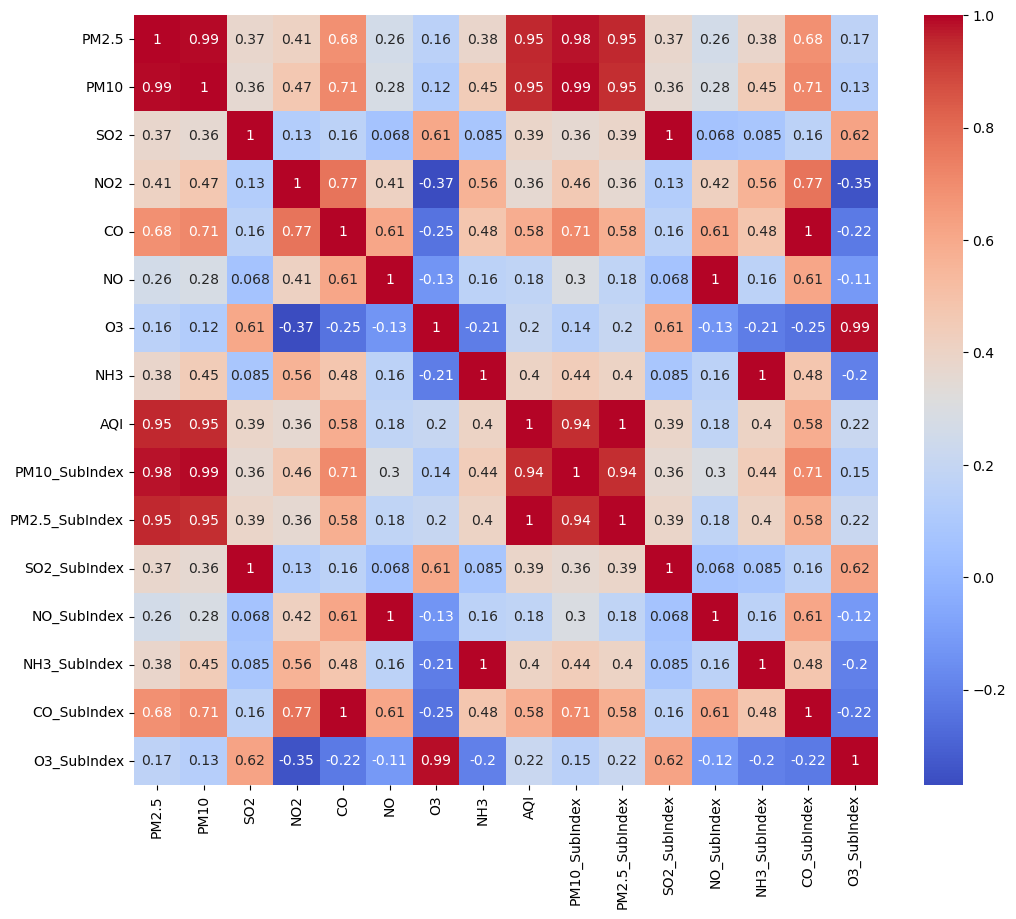

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants in last 3 months


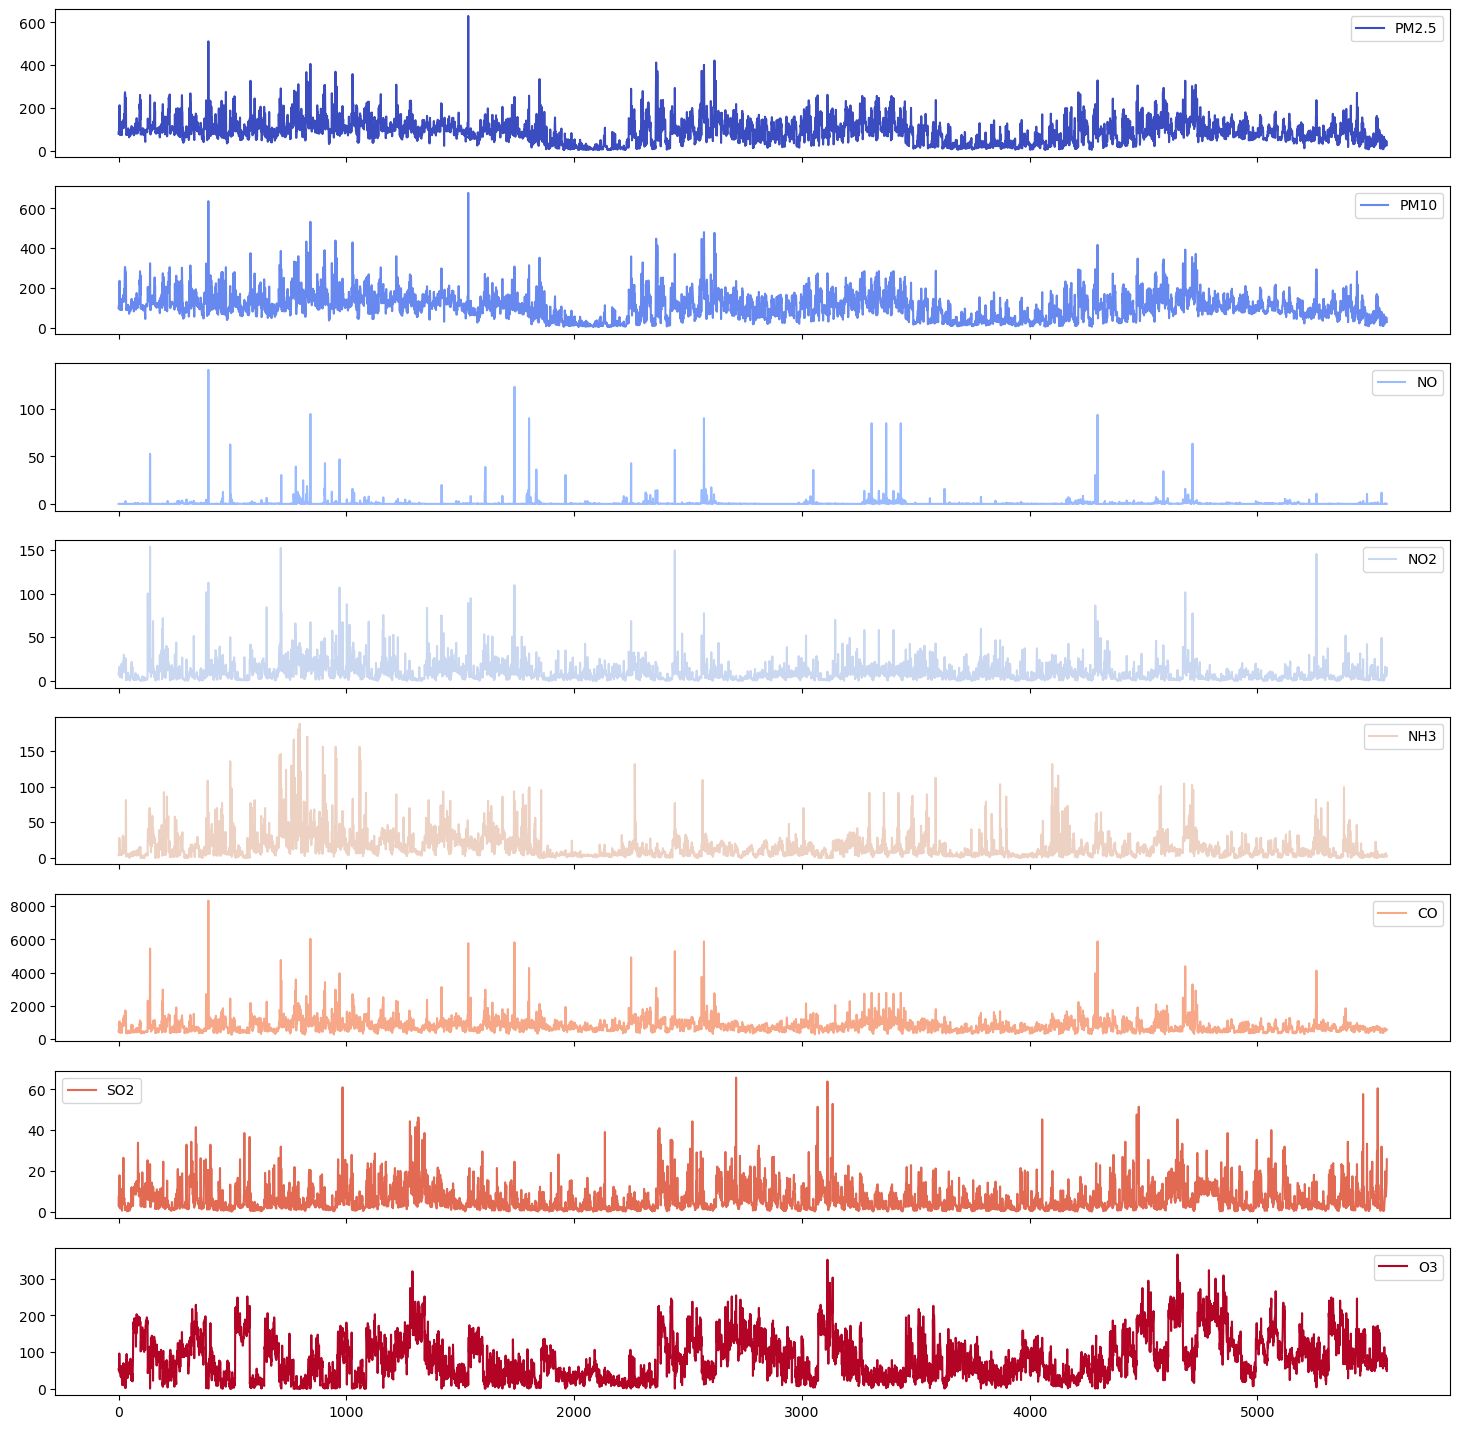

In [12]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2','O3']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 3 months')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

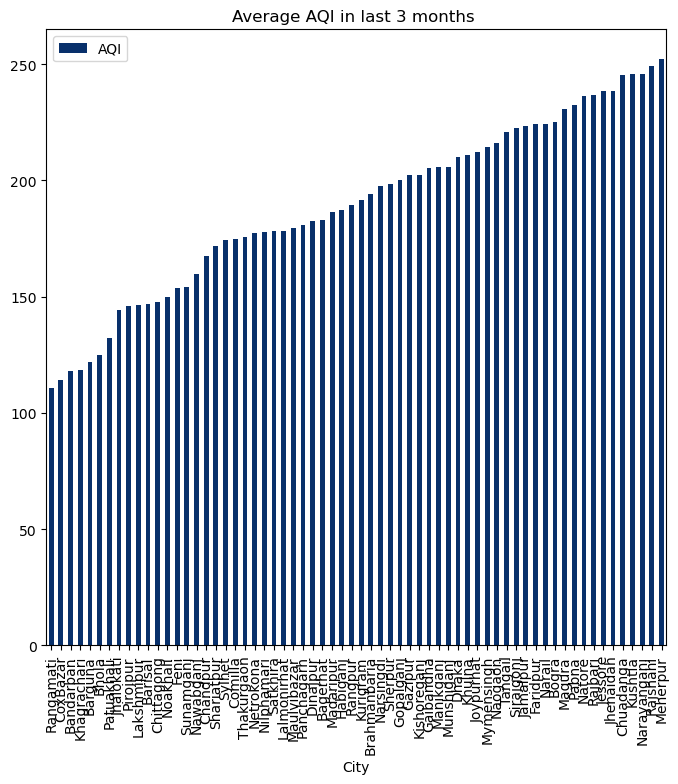

In [13]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 3 months ');

In [14]:
#Creating Model for predicting the Output
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
0,164.800000,Moderate
1,204.800000,Poor
2,159.266667,Moderate
3,321.200000,Very Poor
4,370.923077,Very Poor
...,...,...
5564,64.166667,Satisfactory
5565,49.883333,Good
5566,76.100000,Satisfactory
5567,47.366667,Good


In [15]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [16]:

final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :1, 'Satisfactory' :2, 'Moderate' :3, 'Poor' :4, 'Very Poor' :5,'Severe':6}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
0,164.800000,3
1,204.800000,4
2,159.266667,3
3,321.200000,5
4,370.923077,5


In [17]:

X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [18]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9988031119090365


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
d_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
d_f1 = f1_score(y_test, y_pred, average='weighted')
c = confusion_matrix(y_test, y_pred)
print("Accuracy:", d_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", d_f1)
print(c)

Accuracy: 0.9988031119090365
Precision: 0.9988270496708558
Recall: 0.9988031119090365
F1 Score: 0.9988088091484767
[[237   0   0   0   0   0]
 [  0 240   0   0   0   0]
 [  0   0 395   0   0   0]
 [  0   0   0 365   1   0]
 [  0   0   0   0 408   1]
 [  0   0   0   0   0  24]]


In [20]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
clf = SVC(kernel='rbf', random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.983243566726511


In [21]:
s_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
s_f1 = f1_score(y_test, y_pred, average='weighted')
c = confusion_matrix(y_test, y_pred)
print("Accuracy:", s_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", s_f1)
print(c)

Accuracy: 0.983243566726511
Precision: 0.9836827038029095
Recall: 0.983243566726511
F1 Score: 0.9831130262512988
[[237   0   0   0   0   0]
 [  3 237   0   0   0   0]
 [  0   6 387   2   0   0]
 [  0   0   0 354  12   0]
 [  0   0   0   0 409   0]
 [  0   0   0   0   5  19]]


In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.983243566726511
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       237
           2       0.98      0.99      0.98       240
           3       1.00      0.98      0.99       395
           4       0.99      0.97      0.98       366
           5       0.96      1.00      0.98       409
           6       1.00      0.79      0.88        24

    accuracy                           0.98      1671
   macro avg       0.99      0.95      0.97      1671
weighted avg       0.98      0.98      0.98      1671

[[237   0   0   0   0   0]
 [  3 237   0   0   0   0]
 [  0   6 387   2   0   0]
 [  0   0   0 354  12   0]
 [  0   0   0   0 409   0]
 [  0   0   0   0   5  19]]


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)


clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
TP, FN, FP, TN = matrix.reshape(-1)
print('Values of TP, FN, FP, TN:', TP, FN, FP, TN)


acc_func = accuracy_score(y_test, y_pred)
print('Accuracy from function:', acc_func)
acc_form = (TP + TN) / (TP + FN + FP + TN)
print('Accuracy from formula:', acc_form)


prec_func = precision_score(y_test, y_pred, average='weighted')

print('Precision from function:', prec_func)
prec_form = TP / (TP + FP)
print('Precision from formula:', prec_form)


rec_func = recall_score(y_test, y_pred, average='weighted')

print('Recall from function:', rec_func)
rec_form = TP / (TP + FN)
print('Recall from formula:', rec_form)


f1_func = f1_score(y_test, y_pred,average='weighted')
print('F1-score from function: ', f1_func)
f1_form = (2 * prec_form * rec_form) / (prec_form + rec_form)
print('F1-score from formula: ', f1_form)


Values of TP, FN, FP, TN: 237 0 0 0
Accuracy from function: 0.9988031119090365
Accuracy from formula: 1.0
Precision from function: 0.9988270496708558
Precision from formula: 1.0
Recall from function: 0.9988031119090365
Recall from formula: 1.0
F1-score from function:  0.9988088091484767
F1-score from formula:  1.0


In [24]:
# Print the F1-score and accuracy of each model
print("SVM - F1-score:", s_f1, "Accuracy:", s_accuracy)
print("Decision Tree - F1-score:", d_f1, "Accuracy:", d_accuracy)
print("Random Forest - F1-score:", f1_func, "Accuracy:", acc_func)

SVM - F1-score: 0.9831130262512988 Accuracy: 0.983243566726511
Decision Tree - F1-score: 0.9988088091484767 Accuracy: 0.9988031119090365
Random Forest - F1-score: 0.9988088091484767 Accuracy: 0.9988031119090365


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset into a Pandas DataFrame
data = df

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Encode the categorical feature "City" using one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
#model = LogisticRegression()
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)


Accuracy: 0.5296229802513465
Classification Report:
               precision    recall  f1-score   support

        Good       0.63      0.54      0.58       168
    Moderate       0.46      0.52      0.49       248
        Poor       0.50      0.45      0.48       255
Satisfactory       0.40      0.36      0.38       157
      Severe       1.00      0.08      0.14        13
   Very Poor       0.63      0.72      0.67       273

    accuracy                           0.53      1114
   macro avg       0.60      0.45      0.46      1114
weighted avg       0.53      0.53      0.52      1114



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset into a Pandas DataFrame
data = df  # Replace 'df' with your actual DataFrame

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Perform one-hot encoding for categorical feature "City"
X = pd.get_dummies(X)

# Convert data type to float
X = X.astype(float)

# Encode the target variable using label encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_labels = encoder.inverse_transform(y_pred_prob.argmax(axis=1))

# Convert the true labels back to their original values
y_test_labels = encoder.inverse_transform(y_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:\n", classification_report)


Epoch 1/100
140/140 [==============================] - 4s 2ms/step - loss: 26.9162 - accuracy: 0.2550
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 8.5825 - accuracy: 0.3670
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 8.5037 - accuracy: 0.3991
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 7.5197 - accuracy: 0.4543
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 5.2576 - accuracy: 0.4804
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: 8.1288 - accuracy: 0.4570
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 6.1908 - accuracy: 0.5145
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: 5.9364 - accuracy: 0.4844
Epoch 9/100
140/140 [==============================] - 0s 2ms/step - loss: 4.0542 - accuracy: 0.5452
Epoch 10/100
140/140 [==============================] - 0s 2ms/step - loss: 4.2591 - accur

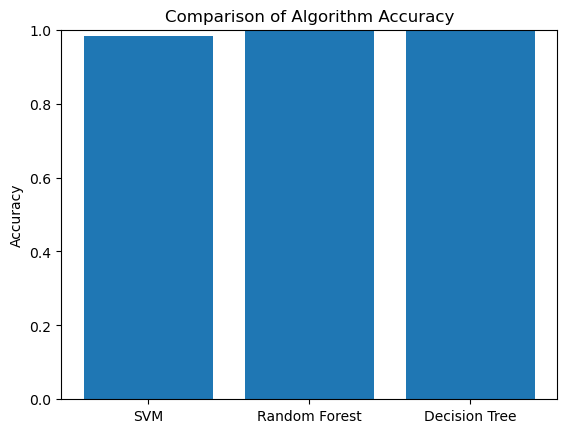

In [27]:
import matplotlib.pyplot as plt
plt.bar(['SVM', 'Random Forest', 'Decision Tree'], [s_accuracy, acc_func, d_accuracy])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracy')
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset into a Pandas DataFrame
data = df

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Encode the categorical feature "City" using one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Create and train the RandomForest model with optimized hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_

# Match feature importances to their corresponding feature names
encoded_feature_names = encoder.get_feature_names_out(input_features=X.columns)
feature_importances_df = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)


                              Feature  Importance
26652              NO_SubIndex_0.0125    0.045032
10698                         NO_0.01    0.037409
10594                      CO_1108.17    0.033026
27604    CO_SubIndex_6718.64705882353    0.027350
10699                         NO_0.02    0.022207
...                               ...         ...
9392                      PM10_243.68    0.000000
9391                      PM10_243.46    0.000000
9390                      PM10_243.22    0.000000
9389                      PM10_243.06    0.000000
28203  O3_SubIndex_329.35250463821893    0.000000

[28204 rows x 2 columns]
